<a href="https://colab.research.google.com/github/cynthiacc512/TA-prediksi-stroke-dnn-dropout/blob/main/DNN%2BIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import learning_curve
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import mutual_info_classif

In [ ]:
!python --version

Python 3.7.13


# Data Preprocessing

In [ ]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Drop column

In [ ]:
df.drop(['id'], axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Cek Data Null

In [ ]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['smoking_status'] = df['smoking_status'].replace(np.nan, 'unknown')

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Encoding

In [ ]:
df['gender'].replace(['Male', 'Female', 'Other'],[0, 1, 2], inplace=True)
df['ever_married'].replace(['No', 'Yes'],[0, 1], inplace=True)
df['work_type'].replace(['Never_worked', 'children', 'Govt_job', 'Private', 'Self-employed'],[0, 1, 2, 3, 4], inplace=True)
df['Residence_type'].replace(['Rural', 'Urban'],[0, 1], inplace=True)
df['smoking_status'].replace(['unknown','never smoked', 'formerly smoked', 'smokes'],[0, 1, 2,3], inplace=True)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cek Data Duplikat

In [ ]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [ ]:
df.drop_duplicates(keep='last')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,1,10.0,0,0,0,1,1,58.64,20.4,1,0
43396,1,56.0,0,0,1,2,1,213.61,55.4,2,0
43397,1,82.0,1,0,1,3,1,91.94,28.9,2,0
43398,0,40.0,0,0,1,3,1,99.16,33.2,1,0


### Cleaning Outliers

In [ ]:
column = ['age','avg_glucose_level','bmi']
df[column].describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,43400.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.638023
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.400000
50%,44.000000,91.580000,28.100000
75%,60.000000,112.070000,32.600000
max,82.000000,291.050000,97.600000


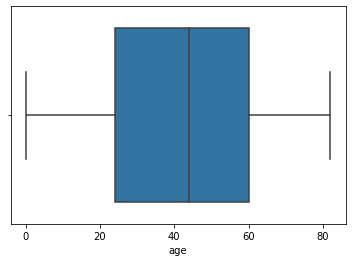

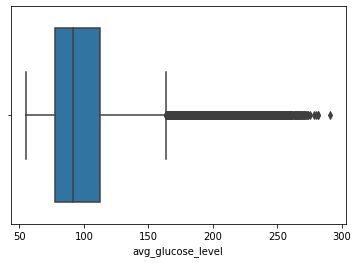

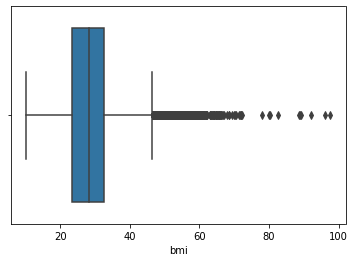

In [ ]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

In [ ]:
df = df[(df['bmi'] <= 54 )]
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000,43117.000000
mean,0.591159,42.201443,0.092933,0.047545,0.642855,2.733423,0.501334,104.341120,28.401391,1.167915,0.018114
std,0.492144,22.562909,0.290342,0.212804,0.479163,0.904601,0.500004,42.946278,7.215377,1.027503,0.133363
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.530000,23.400000,0.000000,0.000000
50%,1.000000,44.000000,0.000000,0.000000,1.000000,3.000000,1.000000,91.560000,28.000000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,111.960000,32.500000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,54.000000,3.000000,1.000000


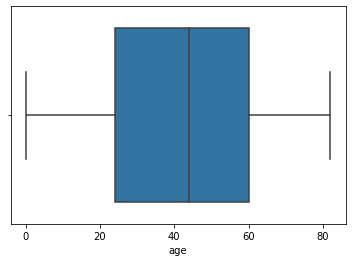

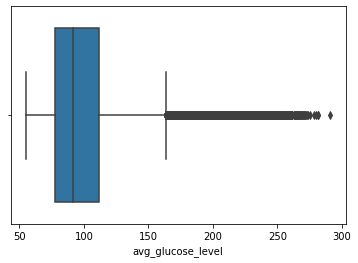

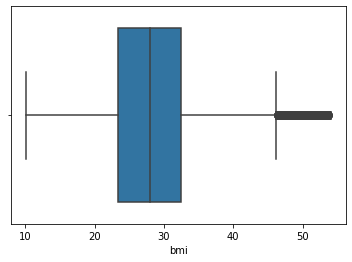

In [ ]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

## Handling Imbalanced Class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


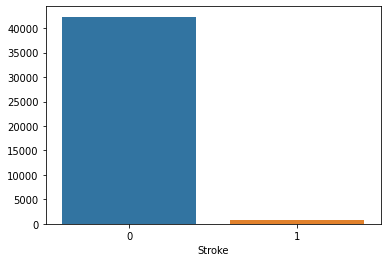

Tidak stroke (0) :  42336
Terkena stroke (1) :  781


In [ ]:
xs = df['stroke'].value_counts().index
ys = df['stroke'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("Stroke")
plt.show()
print("Tidak stroke (0) : ", str(ys[0]))
print("Terkena stroke (1) : ", str(ys[1]))

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,3.0,0,0,0,1,0,95.12,18.0,0,0
1,0,58.0,1,0,1,3,1,87.96,39.2,1,0
2,1,8.0,0,0,0,3,1,110.89,17.6,0,0
3,1,70.0,0,0,1,3,0,69.04,35.9,2,0
4,0,14.0,0,0,0,0,0,161.28,19.1,0,0


## Split Dataset

In [ ]:
x  = df[['gender','age','hypertension','heart_disease','ever_married','work_type', 'Residence_type','avg_glucose_level', 'bmi','smoking_status']]
y = df['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
21019,0,34.0,0,0,1,2,1,124.47,36.7,1
41033,0,25.0,0,0,1,3,1,165.25,34.3,3
10335,1,65.0,0,0,1,3,1,103.72,25.8,1
9754,0,46.0,0,0,1,2,1,105.07,28.9,3
18348,1,48.0,0,0,1,3,0,84.18,40.1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43117 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43117 non-null  int64  
 1   age                43117 non-null  float64
 2   hypertension       43117 non-null  int64  
 3   heart_disease      43117 non-null  int64  
 4   ever_married       43117 non-null  int64  
 5   work_type          43117 non-null  int64  
 6   Residence_type     43117 non-null  int64  
 7   avg_glucose_level  43117 non-null  float64
 8   bmi                43117 non-null  float64
 9   smoking_status     43117 non-null  int64  
 10  stroke             43117 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 3.9 MB


In [ ]:
mutual_info = mutual_info_classif(x_train.fillna(0), y_train, random_state=42)
mutual_info

array([0.00287766, 0.01648343, 0.00226903, 0.00411808, 0.00500134,
       0.0056176 , 0.00186442, 0.00221215, 0.00380189, 0.0022225 ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

age                  0.016483
work_type            0.005618
ever_married         0.005001
heart_disease        0.004118
bmi                  0.003802
gender               0.002878
hypertension         0.002269
smoking_status       0.002223
avg_glucose_level    0.002212
Residence_type       0.001864
dtype: float64

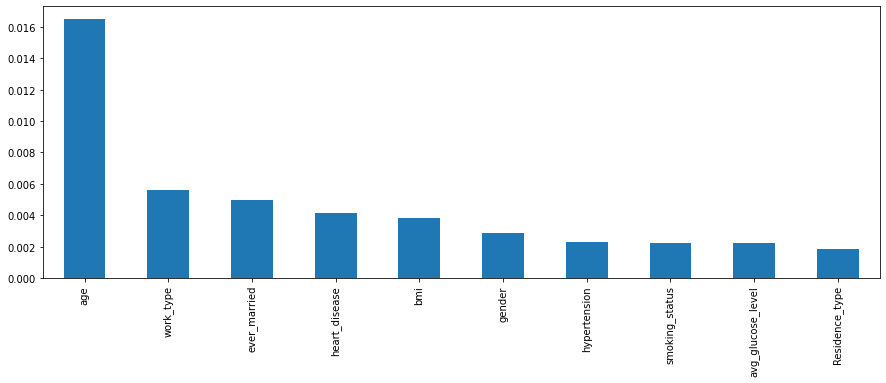

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
# from sklearn.feature_selection import SelectPercentile
# selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
# selected_top_columns.fit(x_train.fillna(0), y_train)
# selected_top_columns.get_support()

sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(x_train.fillna(0), y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['age', 'heart_disease', 'ever_married', 'work_type', 'bmi'], dtype='object')

In [ ]:
df_top_feature_train = x_train.copy()
df_top_feature_train = df_top_feature_train[df_top_feature_train.columns[sel_five_cols.get_support()]]
df_top_feature_train

,age,heart_disease,ever_married,work_type,bmi
21019,34.0,0,1,2,36.700000
41033,25.0,0,1,3,34.300000
10335,65.0,0,1,3,25.800000
9754,46.0,0,1,2,28.900000
18348,48.0,0,1,3,40.100000
...,...,...,...,...,...
6314,59.0,0,1,2,30.800000
11364,54.0,0,1,4,25.900000
38411,39.0,0,0,3,47.500000
874,71.0,0,1,4,28.605038


In [ ]:
df_top_feature_test = x_test.copy()
df_top_feature_test = df_top_feature_test[df_top_feature_test.columns[sel_five_cols.get_support()]]
df_top_feature_test

,age,heart_disease,ever_married,work_type,bmi
36607,47.0,0,1,3,21.5
32133,81.0,0,1,3,28.0
33663,27.0,0,0,3,33.7
42482,64.0,0,1,4,40.7
18599,69.0,0,1,2,33.7
...,...,...,...,...,...
38311,28.0,0,1,3,41.2
41113,67.0,0,1,3,31.9
42627,36.0,0,1,3,31.6
21521,52.0,0,1,4,21.7


In [ ]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(df_top_feature_train)
x_test_scaled = scaler.transform(df_top_feature_test)

# Deep Neural Network Library (Tanpa Dropout)

In [ ]:
weights_assigned = {0:1, 1:(42336/781)}

In [ ]:
print(weights_assigned)

{0: 1, 1: 54.20742637644046}


In [ ]:
lr = 0.1
hl = 2
AF = 'tanh'
epoch = 10

In [ ]:
units = 10

model = Sequential()

model.add(Dense(units, activation = AF, input_dim = 5))
for i in range(hl):
  model.add(Dense(units, activation = AF))

model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, class_weight=weights_assigned, epochs = epoch, validation_data=(x_test_scaled, y_test))

Epoch 1/10
1078/1078 [==============================] - 8s 6ms/step - loss: 1.5113 - accuracy: 0.5237 - val_loss: 0.4717 - val_accuracy: 0.9789
Epoch 2/10
1078/1078 [==============================] - 4s 4ms/step - loss: 1.4948 - accuracy: 0.4952 - val_loss: 0.1762 - val_accuracy: 0.9789
Epoch 3/10
1078/1078 [==============================] - 4s 4ms/step - loss: 1.5289 - accuracy: 0.5009 - val_loss: 1.3509 - val_accuracy: 0.0211
Epoch 4/10
1078/1078 [==============================] - 4s 4ms/step - loss: 1.5187 - accuracy: 0.4865 - val_loss: 1.1182 - val_accuracy: 0.0211
Epoch 5/10
1078/1078 [==============================] - 3s 3ms/step - loss: 1.5250 - accuracy: 0.5232 - val_loss: 0.3684 - val_accuracy: 0.9789
Epoch 6/10
1078/1078 [==============================] - 2s 2ms/step - loss: 1.5583 - accuracy: 0.5233 - val_loss: 0.3895 - val_accuracy: 0.9789
Epoch 7/10
1078/1078 [==============================] - 2s 2ms/step - loss: 1.4940 - accuracy: 0.4969 - val_loss: 0.6006 - val_accuracy:

In [ ]:
acc = model.evaluate(x_test_scaled, y_test)

270/270 [==============================] - 0s 1ms/step - loss: 1.0863 - accuracy: 0.0211


In [ ]:
y_pred = model.predict(x_test_scaled)
gmean = 0

if gmean == 0 or math.isnan(gmean):
  y_pred = y_pred >= 0.5
else:
  y_pred = y_pred >= gmean

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix')
print(cm)
true_positive = cm[1,1]
true_negative = cm[0,0]
false_positive = cm[0,1]
false_negative = cm[1,0]


tpr = true_positive / (true_positive + false_negative)
fpr = false_positive / (false_positive + true_negative)
gmean = round(math.sqrt(tpr*(1-fpr)),3)
print('TPR: '+ str(tpr))
print('FPR: '+ str(fpr))
print('G-mean: '+ str(gmean))


y_pred = model.predict(x_test_scaled)

if gmean == 0 or math.isnan(gmean):
  y_pred = y_pred >= 0.5
else:
  y_pred = y_pred >= gmean

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix')
print(cm)
true_positive = cm[1,1]
true_negative = cm[0,0]
false_positive = cm[0,1]
false_negative = cm[1,0]

print('True Negative = ', true_negative)
print('False Negative = ', false_negative)
print('True Positive = ', true_positive)
print('False Positive = ', false_positive)

tpr = true_positive / (true_positive + false_negative)
fpr = false_positive / (false_positive + true_negative)
gmean = round(math.sqrt(tpr*(1-fpr)),3)

auc = roc_auc_score(y_pred, y_test)

print('TPR: '+ str(tpr))
print('FPR: '+ str(fpr))
print('G-mean: '+ str(gmean))
print('ROC: '+ str(auc))

Confusion Matrix
[[   0    0]
 [8442  182]]
TPR: 0.021103896103896104
FPR: nan
G-mean: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


Confusion Matrix
[[   0    0]
 [8442  182]]
True Negative =  0
False Negative =  8442
True Positive =  182
False Positive =  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in long_scalars


ValueError: ignored

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# from plot_keras_history import show_history, plot_history

# show_history(fit)
# plot_history(fit, path="standard.png")
# plt.close()

# from mlxtend.plotting import plot_learning_curves

# plot_learning_curves(x_train_scaled, y_train, x_test_scaled, y_test, y_pred)
# plt.show()

# Deep Neural Network Scratch (Pakai Dropout)

In [ ]:
X= x_train_scaled
y_temp= []
y_temp2 = []

for i in range(len(y_train)):
  temp = ([y_train.iloc[i]])
  y_temp.append(temp)
y = np.array((y_temp), dtype=np.float128)

for i in range(len(y_test)):
  temp2= ([y_test.iloc[i]])
  y_temp2.append(temp2)
y2 = np.array((y_temp2), dtype=np.float128)

# Activation function
def sigmoid(t):
  t = t.astype(np.float128)
  return 1/(1+np.exp(-t))

def sigmoid_derivative(t):
  t = t.astype(np.float128)
  return sigmoid(t) * (1-sigmoid(t))

def tanh(t):
  t = t.astype(np.float128)
  # return (np.exp(t) - np.exp(-t))/(np.exp(t) + np.exp(-t))
  return np.tanh(t)

def tanh_derivative(t):
  t = t.astype(np.float128)
  return 1-np.tanh(t)**2

def relu(t):
  t = t.astype(np.float128)
  # a = np.zeros(t.shape,dtype=np.float128)
  # return np.maximum(a,t)
  return np.maximum(0, t)

def relu_derivative(t):
  t = t.astype(np.float128)
  t[t <= 0] = 0
  t[t > 0] = 1
  return t
  # return np.greater(t, 0.).astype(np.float128)

In [ ]:
scaler_csl = StandardScaler()

In [ ]:
class DeepNeuralNetworkDropout:
  def __init__(self, x,x_test_scaled,y, y2, units, hidden_layer, rate, gmean):
    np.random.seed(42)

    self.weights = {}
    self.input = x_train_scaled
    self.neuron_input = self.input.shape[1]
    self.neuron_output = 1
    self.rate = rate
    self.gmean = gmean
    self.mask = []

    for i in range(hidden_layer): 
      self.weights[i] = np.random.rand(self.neuron_input,units) * np.sqrt(1. / self.input.shape[1])
      self.neuron_input = units
    self.weights[hidden_layer] = np.random.randn(units, self.neuron_output) * np.sqrt(1. / units)
    
    self.y = y
    self.output = np.zeros(y.shape)

  def forward_prop(self, hidden_layer):
    self.layer = {}
    self.D = {}

    self.layer[0] = relu(np.dot(self.input, self.weights[0]))
    self.D[0] = np.random.rand(self.layer[0].shape[0],self.layer[0].shape[1])
    self.D[0] = (self.D[0] < 0.1) #rate awal 0.1
    self.layer[0] = self.layer[0] * self.D[0]
    self.layer[0] = self.layer[0] / self.rate

    for i in range(hidden_layer+1): #jml hl+1
      if i != 0:
        self.layer[i] = relu(np.dot(self.layer[i-1], self.weights[i]))
        self.D[i] = np.random.rand(self.layer[i].shape[0],self.layer[i].shape[1])
        self.D[i] = (self.D[0] < self.rate)
        self.layer[i] = self.layer[i] * self.D[i]
        self.layer[i] = self.layer[i] / self.rate
      if i == hidden_layer:
        self.layer[i] = sigmoid(np.dot(self.layer[i-1], self.weights[i]))
        self.D[i] = np.random.rand(self.layer[i].shape[0],self.layer[i].shape[1])
        self.D[i] = (self.D[i] < self.rate)
        self.layer[i] = self.layer[i] * self.D[i]
        self.layer[i] = self.layer[i] / self.rate
    return self.layer[i]

  def backward_prop(self, hidden_layer):
    dW = {}
    E = {}

    E[hidden_layer] = 2*(self.y - self.output) * sigmoid_derivative(self.output)
    E[hidden_layer] = E[hidden_layer] * self.D[hidden_layer]
    E[hidden_layer] = E[hidden_layer] / self.rate
    self.layer[hidden_layer-1] = np.multiply(E[hidden_layer], np.int64(self.layer[hidden_layer]>0))
    dW[hidden_layer] = np.dot(self.layer[hidden_layer-1].T, E[hidden_layer])

    for i in reversed(range(hidden_layer)): 
      if i != 0:
        E[i] = np.dot(E[i+1], self.weights[i+1].T) * relu_derivative(self.layer[i])
        E[i] = E[i] * self.D[i]
        E[i] = E[i] / self.rate
        self.layer[i] = np.multiply(E[i], np.int64(self.layer[i]>0))
        dW[i] = np.dot(self.layer[i-1].T,E[i])
      if i == 0:
        E[0]= np.dot(E[1], self.weights[1].T) * relu_derivative(self.layer[0])
        E[i] = E[i] * self.D[i]
        E[i] = E[i] / self.rate
        self.layer[i] = np.multiply(E[i], np.int64(self.layer[i]>0))
        dW[0] = np.dot(self.input.T, E[0])
    for i in range(hidden_layer+1):
      self.weights[i] += 0.01* dW[i]  #lr

  def train(self, X, y, hidden_layer):
    self.output = self.forward_prop(hidden_layer)
    self.backward_prop(hidden_layer)
  
  def hitung_akurasi(self, X, y):
    predictions = []
    counter = 0

    for i in range(len(y)):
      if np.isnan(self.gmean):
        if self.output[i] >= 0.5:
          prediksi = 1
        else:
          prediksi = 0
        predictions.append(prediksi)
      else:
        if self.output[i] >= self.gmean:
          prediksi = 1
        else:
          prediksi = 0
        predictions.append(prediksi)

      if predictions[i] == y[i]:
        counter = counter+1
        
    akurasi = (counter/len(y)) * 100    

    cm = confusion_matrix(predictions, y)
    true_positive = cm[1,1]
    true_negative = cm[0,0]
    false_positive = cm[0,1]
    false_negative = cm[1,0]

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)
    gmean = math.sqrt(tpr*(1-fpr))
    self.gmean = gmean

    print('G-mean: '+ str(self.gmean))
    print('Akurasi: '+ str(akurasi))

    return self.gmean

  def akurasi_testing(self, x_test_scaled, y2):
    predictions = []
    counter = 0

    print('G-mean2: '+ str(self.gmean))

    for i in range(len(y2)):
      if np.isnan(self.gmean):
        if self.output[i] >= 0.5:
          prediksi = 1
        else:
          prediksi = 0
        predictions.append(prediksi)
      else:
        if self.output[i] >= self.gmean:
          prediksi = 1
        else:
          prediksi = 0
        predictions.append(prediksi)
    
      
      if predictions[i] == y[i]:
        counter = counter+1

    akurasi = (counter/len(y2)) * 100
    print('\n')
    print('Akurasi testing: '+ str(akurasi))
    print('\n')
    cm = confusion_matrix(predictions, y2)
    
    print(cm)
    true_positive = cm[1,1]
    true_negative = cm[0,0]
    false_positive = cm[0,1]
    false_negative = cm[1,0]

    print('True Negative = ', true_negative)
    print('False Negative = ', false_negative)
    print('True Positive = ', true_positive)
    print('False Positive = ', false_positive)
    print('\n') 
    auc = roc_auc_score(predictions, y2)
    print('ROC: '+ str(auc))
    print('\n') 

    tpr = true_positive / (true_positive + false_negative)
    fpr = false_positive / (false_positive + true_negative)
    gmean_testing = math.sqrt(tpr*(1-fpr))

    acc = (true_positive + true_negative) / (true_positive + false_negative + true_negative + false_positive)

    print('TPR: '+ str(tpr))
    print('FPR: '+ str(fpr))
    print('G-mean: '+ str(gmean_testing))
    print('acc: '+ str(acc))


    fpr2, tpr2, thres2 = roc_curve(predictions, y2)
    print('TPR: '+ str(tpr2))
    print('FPR: '+ str(fpr2))

    plt.plot(fpr2, tpr2, label=f'AUC (Dropout) = {auc:.3f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Baseline')
    plt.title('ROC Curve', size=20)
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend();

    return acc


units = 10

hl = 20
rate= 0.8
epoch = 50
gmean = 0


DNN_dropout = DeepNeuralNetworkDropout(X, x_test_scaled, y, y2, units, hl, rate, gmean) #units, hl, rate, gmean
for i in range(epoch): 
  print ("Epoch: " + str(i+1))
  forward = DNN_dropout.forward_prop(hl)
  print ("Loss: " + str(np.mean(np.square(y - forward)))) # mean sum squared loss


  csl = forward + (42336/781)
  csl = scaler_csl.fit_transform(csl)
  csl_max = np.max(csl)

  class_weights = {0: 1.0, 1: csl_max}
  compute_class_weight(class_weights, classes=np.arange(2), y=np.array(y_test))


  DNN_dropout.train(X, y, hl)

  DNN_dropout.hitung_akurasi(X,y)
predict = DNN_dropout.akurasi_testing(x_test_scaled,y2)




# sizes, training_scores, testing_scores = learning_curve(predict, X, y)
  
# # Mean and Standard Deviation of training scores
# mean_training = np.mean(training_scores, axis=1)
# Standard_Deviation_training = np.std(training_scores, axis=1)
  
# # Mean and Standard Deviation of testing scores
# mean_testing = np.mean(testing_scores, axis=1)
# Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# # dotted blue line is for training scores and green line is for cross-validation score
# plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
# plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# # Drawing plot
# plt.title("LEARNING CURVE")
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
# plt.tight_layout()
# plt.show()
